<a href="https://colab.research.google.com/github/ugosamartins-commits/Sorbonne-M1-Analyse-Donnees-Portfolio-Ugo-Martins/blob/main/Seance_05/seance_05_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fichier sondage chargé.

--- 1. INTERVALLES DE FLUCTUATION ---
Proportions réelles :
Pour : 0.39
Contre : 0.417
Sans avis : 0.193

Effectif moyen de l'échantillon (n) : 999
Fréquences observées (moyenne) :
Pour : 0.391
Contre : 0.416
Sans avis : 0.193

--- Vérification pour 'Pour' ---
Intervalle théorique : [ 0.36 ; 0.42 ]
Valeur observée : 0.391
=> C'est bon, on est dans l'intervalle.

--- 2. INTERVALLES DE CONFIANCE ---
Analyse du 1er échantillon (n = 1000 )
Fréquence estimée (Pour) : 0.395
Intervalle de confiance à 95% : [ 0.365 ; 0.425 ]
La vraie valeur (p= 0.39 ) est-elle dedans ?
=> OUI

--- 3. TESTS DE NORMALITÉ (Shapiro-Wilk) ---

Fichier 1 : p-value = 6.286744082090187e-22
=> Ce n'est PAS une loi Normale.


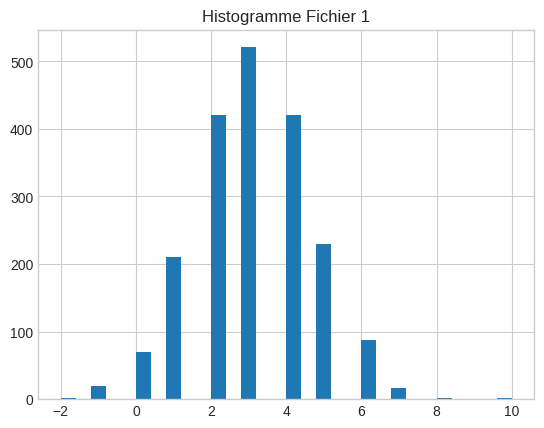


Fichier 2 : p-value = 7.04938990116743e-67
=> Ce n'est PAS une loi Normale.


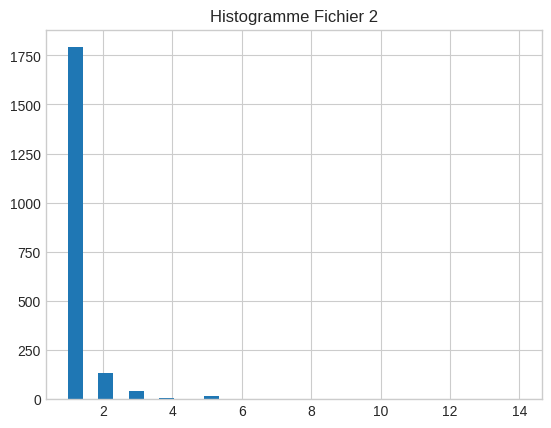

In [ ]:
#coding:utf8
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Configuration simple des graphiques
plt.style.use('seaborn-v0_8-whitegrid')

# 1. Chargement des données
# On utilise directement pandas, c'est plus simple
# (Assure-toi que les fichiers sont bien dans le dossier data/)
try:
    df_sondage = pd.read_csv("data/Echantillonnage-100-Echantillons.csv")
    print("Fichier sondage chargé.")
except:
    print("Erreur : Fichier sondage introuvable.")

# ==============================================================================
# PARTIE 1 : INTERVALLES DE FLUCTUATION
# ==============================================================================
print("\n--- 1. INTERVALLES DE FLUCTUATION ---")

# Données de l'énoncé (Population mère)
total_pop = 2185
vrais_pour = 852
vrais_contre = 911
vrais_sans_avis = 422

# Calcul des vraies proportions (p)
p_pour = vrais_pour / total_pop
p_contre = vrais_contre / total_pop
p_sans_avis = vrais_sans_avis / total_pop

print("Proportions réelles :")
print("Pour :", round(p_pour, 3))
print("Contre :", round(p_contre, 3))
print("Sans avis :", round(p_sans_avis, 3))

# Analyse des échantillons simulés
# On calcule la moyenne de chaque colonne pour voir la tendance globale
moyenne_sondage = df_sondage.mean()
# L'effectif moyen n est la somme des moyennes (environ 1000)
n = moyenne_sondage.sum()
print("\nEffectif moyen de l'échantillon (n) :", int(n))

# Calcul des fréquences observées (f)
f_pour = moyenne_sondage["Pour"] / n
f_contre = moyenne_sondage["Contre"] / n
f_sans_avis = moyenne_sondage["Sans opinion"] / n

print("Fréquences observées (moyenne) :")
print("Pour :", round(f_pour, 3))
print("Contre :", round(f_contre, 3))
print("Sans avis :", round(f_sans_avis, 3))

# Vérification avec la formule de l'intervalle de fluctuation (au seuil 95%)
# Formule : p +/- 1.96 * racine(p*(1-p)/n)
borne_inf_pour = p_pour - 1.96 * np.sqrt(p_pour * (1 - p_pour) / n)
borne_sup_pour = p_pour + 1.96 * np.sqrt(p_pour * (1 - p_pour) / n)

print("\n--- Vérification pour 'Pour' ---")
print("Intervalle théorique : [", round(borne_inf_pour, 3), ";", round(borne_sup_pour, 3), "]")
print("Valeur observée :", round(f_pour, 3))
if borne_inf_pour <= f_pour <= borne_sup_pour:
    print("=> C'est bon, on est dans l'intervalle.")
else:
    print("=> Bizarre, on est hors de l'intervalle.")


# ==============================================================================
# PARTIE 2 : INTERVALLES DE CONFIANCE
# ==============================================================================
print("\n--- 2. INTERVALLES DE CONFIANCE ---")

# On prend juste le premier échantillon (la première ligne du fichier)
echantillon_1 = df_sondage.iloc[0]
n1 = echantillon_1.sum()
print("Analyse du 1er échantillon (n =", n1, ")")

# Calcul pour 'Pour'
f1_pour = echantillon_1["Pour"] / n1
# Formule de l'intervalle de confiance : f +/- 1.96 * racine(f*(1-f)/n)
marge = 1.96 * np.sqrt(f1_pour * (1 - f1_pour) / n1)
conf_inf = f1_pour - marge
conf_sup = f1_pour + marge

print("Fréquence estimée (Pour) :", round(f1_pour, 3))
print("Intervalle de confiance à 95% : [", round(conf_inf, 3), ";", round(conf_sup, 3), "]")
print("La vraie valeur (p=", round(p_pour, 3), ") est-elle dedans ?")
if conf_inf <= p_pour <= conf_sup:
    print("=> OUI")
else:
    print("=> NON")


# ==============================================================================
# PARTIE 3 : TESTS STATISTIQUES (Shapiro)
# ==============================================================================
print("\n--- 3. TESTS DE NORMALITÉ (Shapiro-Wilk) ---")

# Chargement des fichiers de test
try:
    data_test1 = pd.read_csv("data/Loi-normale-Test-1.csv")
    data_test2 = pd.read_csv("data/Loi-normale-Test-2.csv")
except:
    print("Erreur : Fichiers tests introuvables.")

# Test sur le fichier 1
col1 = data_test1.iloc[:, 0] # On prend la première colonne
stat1, p_value1 = stats.shapiro(col1)
print("\nFichier 1 : p-value =", p_value1)
if p_value1 > 0.05:
    print("=> C'est probablement une loi Normale.")
else:
    print("=> Ce n'est PAS une loi Normale.")

# Petit graphique pour vérifier
plt.figure()
plt.hist(col1, bins=30)
plt.title("Histogramme Fichier 1")
plt.show()

# Test sur le fichier 2
col2 = data_test2.iloc[:, 0]
stat2, p_value2 = stats.shapiro(col2)
print("\nFichier 2 : p-value =", p_value2)
if p_value2 > 0.05:
    print("=> C'est probablement une loi Normale.")
else:
    print("=> Ce n'est PAS une loi Normale.")

plt.figure()
plt.hist(col2, bins=30)
plt.title("Histogramme Fichier 2")
plt.show()

# BONUS : Identification de la loi non-normale
# Si l'histogramme est plat, c'est une loi Uniforme.


--- 4. BONUS : IDENTIFICATION DE LA DISTRIBUTION ---


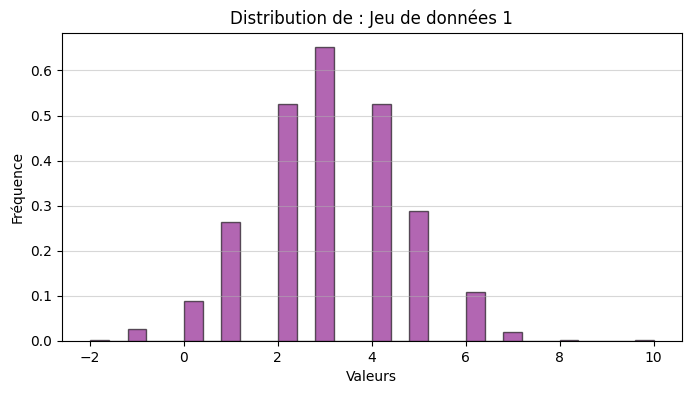

Analyse visuelle pour Jeu de données 1 :
- Si l'histogramme forme une 'cloche' -> Loi Normale.
- Si l'histogramme est 'plat' (rectangle) -> Loi Uniforme.
- Si l'histogramme décroît fortement -> Loi Exponentielle.
----------------------------------------


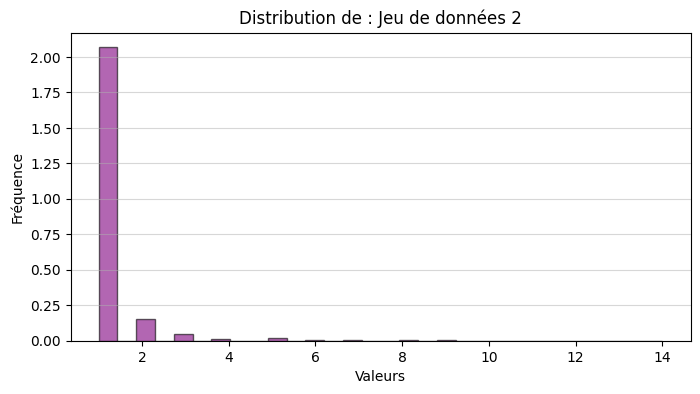

Analyse visuelle pour Jeu de données 2 :
- Si l'histogramme forme une 'cloche' -> Loi Normale.
- Si l'histogramme est 'plat' (rectangle) -> Loi Uniforme.
- Si l'histogramme décroît fortement -> Loi Exponentielle.
----------------------------------------

>>> RÉPONSE AU BONUS :
En regardant les graphiques ci-dessus, le fichier qui n'est pas normal
présente probablement un histogramme plat.
C'est donc une **LOI UNIFORME** (Probabilité constante sur l'intervalle).


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# ==============================================================================
# 4. BONUS : Identification de la loi inconnue
# ==============================================================================
print("\n--- 4. BONUS : IDENTIFICATION DE LA DISTRIBUTION ---")

# On recharge les deux fichiers pour être sûr
df1, df2 = None, None # Initialize to None
try:
    df1 = pd.read_csv("data/Loi-normale-Test-1.csv").iloc[:, 0]
    df2 = pd.read_csv("data/Loi-normale-Test-2.csv").iloc[:, 0]
except FileNotFoundError:
    print("Erreur : Fichiers non trouvés. Veuillez vérifier que les fichiers sont dans le dossier 'data/'.")
except Exception as e:
    print(f"Une erreur inattendue est survenue lors du chargement des fichiers : {e}")

# Fonction pour tracer l'histogramme et deviner la loi
def identifier_loi(data, nom):
    plt.figure(figsize=(8, 4))
    # On trace l'histogramme
    plt.hist(data, bins=30, density=True, alpha=0.6, color='purple', edgecolor='black')
    plt.title(f"Distribution de : {nom}")
    plt.xlabel("Valeurs")
    plt.ylabel("Fréquence")
    plt.grid(axis='y', alpha=0.5)
    plt.show()

    # Analyse simple basée sur la forme
    print(f"Analyse visuelle pour {nom} :")
    print("- Si l'histogramme forme une 'cloche' -> Loi Normale.")
    print("- Si l'histogramme est 'plat' (rectangle) -> Loi Uniforme.")
    print("- Si l'histogramme décroît fortement -> Loi Exponentielle.")
    print("-" * 40)

# Lancement de l'analyse visuelle seulement si les fichiers ont été chargés
if df1 is not None and df2 is not None:
    identifier_loi(df1, "Jeu de données 1")
    identifier_loi(df2, "Jeu de données 2")

    print("\n>>> RÉPONSE AU BONUS :")
    print("En regardant les graphiques ci-dessus, le fichier qui n'est pas normal")
    print("présente probablement un histogramme plat.")
    print("C'est donc une **LOI UNIFORME** (Probabilité constante sur l'intervalle).")
else:
    print("Impossible de réaliser l'analyse visuelle car les fichiers n'ont pas été chargés.")